In [1]:
from dl.simple_cnn import SimpleCNN
from dl.shuffle_net import ShuffleNetV2
from dl.callbacks.plot_loss import PlotLosses
from data.data_set import get_data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import TerminateOnNaN, EarlyStopping, ModelCheckpoint, TensorBoard
from config import DL_MODELS_PATH, TB_LOGS_PATH
import os
import pathlib
from swa.tfkeras import SWA
from dl.callbacks.cyclical_lr import CyclicLR
from plotly.offline import init_notebook_mode
from visualization.visualize_history import plot_accuracy_and_loss
init_notebook_mode(connected=True)

2019-12-16 11:05:57,105 : INFO : Checking/creating directories...
2019-12-16 11:05:57,106 : INFO : Directories are set.


In [2]:
((X_train, y_train), (X_val, y_val)) = get_data()

In [3]:
data_generator = ImageDataGenerator(rotation_range=20,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    horizontal_flip=True,
                                    vertical_flip=True)

In [4]:
def get_callbacks(model_name):
    callbacks = [TerminateOnNaN(), EarlyStopping(monitor='val_categorical_accuracy', patience=5)]
    callbacks.append(ModelCheckpoint(os.path.join(DL_MODELS_PATH, model_name + '-{epoch:02d}-{val_accuracy:.2f}.hdf5'), monitor='val_categorical_accuracy', verbose=1, save_best_only=True, mode='max'))
    tb_path = os.path.join(TB_LOGS_PATH, model_name)
    pathlib.Path(tb_path).mkdir(parents=True, exist_ok=True)
    callbacks.append(TensorBoard(log_dir=tb_path))
    callbacks.append(PlotLosses())
    #callbacks.append(SWA(start_epoch=5, lr_schedule='constant', swa_lr=0.001, verbose=1))
    #callbacks.append(CyclicLR(base_lr=0.001, max_lr=0.006, step_size=2000.))
    return callbacks

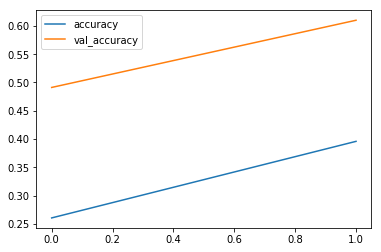

30/29 [==============================] - 10s 327ms/step - loss: 1.5745 - accuracy: 0.3958 - categorical_crossentropy: 1.5759 - categorical_accuracy: 0.3958 - val_loss: 1.2424 - val_accuracy: 0.6101 - val_categorical_crossentropy: 1.2426 - val_categorical_accuracy: 0.6101


In [5]:
simple_cnn_model = SimpleCNN(optimizer=RMSprop())
simple_cnn_history = simple_cnn_model.train(data_generator, X_train, y_train, X_val, y_val,
                          2048, 2, get_callbacks('simple_cnn'))

In [ ]:
plot_accuracy_and_loss(simple_cnn_history.history)

In [ ]:
shufflenetv2_model = ShuffleNetV2(optimizer=RMSprop())

In [ ]:
shufflenetv2_history = shufflenetv2_model.train(data_generator, X_train, y_train, X_val, y_val,
                      128, 100, get_callbacks('shufflenetv2'))

In [ ]:
plot_accuracy_and_loss(shufflenetv2_history.history)

In [6]:
simple_cnn_model.evaluate(X_val, y_val)

Confusion Matrix


ValueError: DataFrame constructor not properly called!

,top,trouser,pullover,dress,coat,sandal,shirt,sneaker,bag,ankle boot,accuracy,macro avg,weighted avg
precision,0.460399,0.776328,0.343267,0.719512,0.471429,0.773148,0.306338,0.784372,0.820896,0.811610,0.6101,0.626730,0.626730
recall,0.715000,0.833000,0.622000,0.354000,0.264000,0.835000,0.174000,0.793000,0.770000,0.741000,0.6101,0.610100,0.610100
f1-score,0.560125,0.803666,0.442390,0.474531,0.338462,0.802885,0.221939,0.788662,0.794634,0.774699,0.6101,0.600199,0.600199
support,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,0.6101,10000.000000,10000.000000


,top,trouser,pullover,dress,coat,sandal,shirt,sneaker,bag,ankle boot,accuracy,macro avg,weighted avg
precision,0.460399,0.776328,0.343267,0.719512,0.471429,0.773148,0.306338,0.784372,0.820896,0.811610,0.6101,0.626730,0.626730
recall,0.715000,0.833000,0.622000,0.354000,0.264000,0.835000,0.174000,0.793000,0.770000,0.741000,0.6101,0.610100,0.610100
f1-score,0.560125,0.803666,0.442390,0.474531,0.338462,0.802885,0.221939,0.788662,0.794634,0.774699,0.6101,0.600199,0.600199
support,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,0.6101,10000.000000,10000.000000
